<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = pd.read_csv("C:\\temp\\Data Science\\IOD\\data\\Sacramento_transactions.csv")

In [3]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [5]:
# ANSWER

#Target variable is Price as we are predicting it.

#### 2.2 List all possible variables which might be Predictor variable.

In [0]:
# ANSWER
beds, baths, sq_ft

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [6]:
# ANSWER
house_csv.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.3 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [36]:
# ANSWER
house_csv['yhat'] = house_csv['price'].mean()

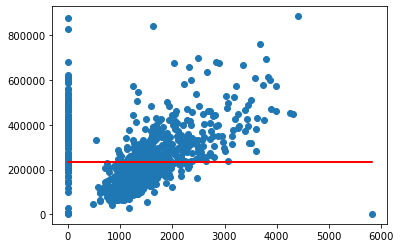

In [39]:
plt.scatter(X, Y)
plt.plot(X, house_csv['yhat'], color = 'r')
plt.show()

#### 2. 4 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [40]:
# ANSWER

# Mean of residual error (difference between each actual price and predicted price)
res = abs(house_csv['price'] - house_csv['yhat']).mean()
res

103452.16956891441

#### 2.5  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.5 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [10]:
# ANSWER
X = house_csv['sq__ft']
Y = house_csv['price']

##### 2.5.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [16]:
# ANSWER
xbar = X.mean()
ybar = Y.mean()

def calc_beta_1 ():
    n = np.sum((Y - ybar)*(X - xbar))
    d = np.sum((X - xbar)**2)
    beta_1 = n/d
    return beta_1


##### 2.5.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [17]:
# ANSWER
def calc_beta_0 ():
    beta_0 = ybar - calc_beta_1() * xbar
    return beta_0

##### 2.4.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [21]:
# ANSWER

def pred_price ():
    yhat1 = calc_beta_0() + calc_beta_1() * X
    return yhat1


##### 2.5.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [22]:
# ANSWER
yhat = pred_price()
res1 = abs(Y - yhat).mean()
res1

95860.1477021408

##### 2.5.D Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [27]:
# ANSWER

def calc_R2 ():
        ss_res = np.sum((Y - yhat)**2)
        ss_tot = np.sum((Y - ybar)**2)
        R2 = 1 - (ss_res/ss_tot)
        return R2

In [29]:
r_score = calc_R2()
r_score

0.11148717682951459

##### 2.5.G [BONUS] Draw Plot of Predicted Line

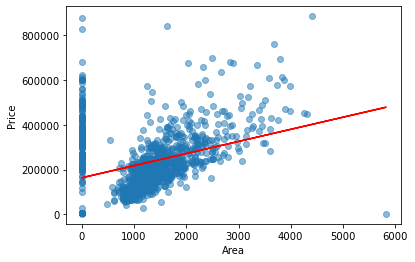

In [25]:
# ANSWER
plt.scatter(X, Y, alpha = 0.5)
plt.plot(X, yhat, color = 'red')
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

##### 2.5.G [BONUS] Draw Plot of Predicted Line With Resudals

In [0]:
# ANSWER


### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [57]:
# ANSWER
print('Predicted price is:' + str(pred_price(1204)))


Predicted price is:228137.1635919888




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



